In [ ]:
# jumlah data
n = len(x)
# rata-rata
x_mean = np.mean(x)
y_mean = np.mean(y)
# komponen pembilang dan penyebut
num = np.sum(x * y) - n * x_mean * y_mean         
# Σ x_i y_i - n x̄ ȳ
den = np.sum(x**2) - n * x_mean**2                
# Σ x_i^2 - n x̄^2
# slope
m = num / den
print("Slope m =", m)
# b
b = y_mean - m * x_mean
print("Intercept b =", b)

LUAS TANAH(M2) (x)	HARGA (JT)(y)
- 1	60	200
- 2	110	450
- 3	160	620
- 4	200	750
- 5	260	900
		

TUGAS PREDIKSI
LUAS TANAH(M2)	HARGA (JT)
- 1	180	??

In [2]:
#1.	Import Library
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#2.	Data Raw
# ---------- Data harga rumah ----------
# Data (x = luas tanah dalam m², y = harga rumah dalam juta rupiah)
x = np.array([60, 110, 160, 200, 260])
y = np.array([200, 450, 620, 750, 900])

print("=== DATA ASLI ===")
print(f"Luas tanah (m²): {x}")
print(f"Harga rumah (juta): {y}")

=== DATA ASLI ===
Luas tanah (m²): [ 60 110 160 200 260]
Harga rumah (juta): [200 450 620 750 900]


In [4]:
#3.	Data Normalisasi
# ---------- Normalisasi ----------
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)

x_norm = (x - x_min) / (x_max - x_min)
y_norm = (y - y_min) / (y_max - y_min)

print("\n=== DATA NORMALISASI ===")
print(f"x_norm = {np.round(x_norm, 4)}")
print(f"y_norm = {np.round(y_norm, 4)}")


=== DATA NORMALISASI ===
x_norm = [0.   0.25 0.5  0.7  1.  ]
y_norm = [0.     0.3571 0.6    0.7857 1.    ]


In [5]:
#4.	Metode OLS
# ---------- Metode OLS pada Data Normalisasi ----------
n = len(x_norm)
x_norm_mean = np.mean(x_norm)
y_norm_mean = np.mean(y_norm)

# komponen pembilang dan penyebut untuk data normalisasi
num = np.sum(x_norm * y_norm) - n * x_norm_mean * y_norm_mean     # Σ x_i y_i - n x̄ ȳ
den = np.sum(x_norm**2) - n * x_norm_mean**2                      # Σ x_i² - n x̄²

# slope dan intercept di ruang normalisasi
m_norm = num / den
b_norm = y_norm_mean - m_norm * x_norm_mean

print(f"\n=== HASIL REGRESI DI RUANG NORMALISASI ===")
print(f"Slope (m_norm)     = {m_norm:.6f}")
print(f"Intercept (b_norm) = {b_norm:.6f}")
print(f"Persamaan garis normalisasi: y_norm = {m_norm:.6f} * x_norm + {b_norm:.6f}")


=== HASIL REGRESI DI RUANG NORMALISASI ===
Slope (m_norm)     = 0.988847
Intercept (b_norm) = 0.064037
Persamaan garis normalisasi: y_norm = 0.988847 * x_norm + 0.064037


In [9]:
# 5. KONVERSI KE SKALA ASLI (TAMBAHAN BARU)
# ---------- Konversi parameter ke skala asli ----------
m_actual = m_norm * (y_max - y_min) / (x_max - x_min)
b_actual = b_norm * (y_max - y_min) + y_min - m_actual * x_min

print(f"\n=== KONVERSI KE SKALA ASLI ===")
print(f"Slope (m_actual)     = {m_actual:.6f}")
print(f"Intercept (b_actual) = {b_actual:.6f}")
print(f"Persamaan garis asli: y = {m_actual:.6f} * x + {b_actual:.6f}")


=== KONVERSI KE SKALA ASLI ===
Slope (m_actual)     = 3.460963
Intercept (b_actual) = 37.167774
Persamaan garis asli: y = 3.460963 * x + 37.167774


In [10]:
# 6. Prediksi Normalisasi - Denormalisasi
# ---------- Prediksi dengan Dua Cara ----------
x_pred = 180

print(f"\n=== PREDIKSI UNTUK LUAS {x_pred} m² ===")

# Cara 1: Prediksi di ruang normalisasi lalu denormalisasi
x_pred_norm = (x_pred - x_min) / (x_max - x_min)
y_pred_norm = m_norm * x_pred_norm + b_norm
y_pred_1 = y_pred_norm * (y_max - y_min) + y_min

print("Cara 1 (Normalisasi → Prediksi → Denormalisasi):")
print(f"  x_pred = {x_pred} → x_norm = {x_pred_norm:.4f}")
print(f"  y_norm_pred = {m_norm:.4f} × {x_pred_norm:.4f} + {b_norm:.4f} = {y_pred_norm:.4f}")
print(f"  y_pred = {y_pred_norm:.4f} × {y_max-y_min} + {y_min} = {y_pred_1:.2f} juta")

# Cara 2: Langsung menggunakan persamaan di skala asli
y_pred_2 = m_actual * x_pred + b_actual
print(f"\nCara 2 (Langsung di skala asli):")
print(f"  y_pred = {m_actual:.6f} × {x_pred} + {b_actual:.6f} = {y_pred_2:.2f} juta")


=== PREDIKSI UNTUK LUAS 180 m² ===
Cara 1 (Normalisasi → Prediksi → Denormalisasi):
  x_pred = 180 → x_norm = 0.6000
  y_norm_pred = 0.9888 × 0.6000 + 0.0640 = 0.6573
  y_pred = 0.6573 × 700 + 200 = 660.14 juta

Cara 2 (Langsung di skala asli):
  y_pred = 3.460963 × 180 + 37.167774 = 660.14 juta


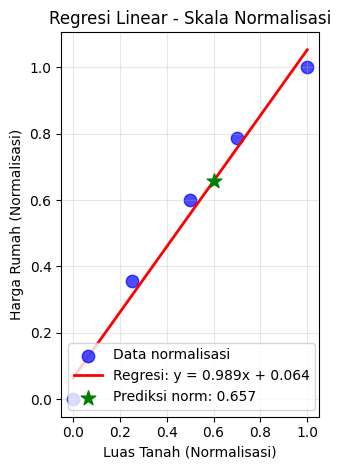

In [ ]:
#7.	Visualisasi
# Plot 2: Data normalisasi dengan regresi
plt.subplot(1, 2, 2)
x_norm_line = np.linspace(0, 1, 100)
y_norm_line = m_norm * x_norm_line + b_norm

plt.scatter(x_norm, y_norm, color='blue', s=80, label='Data normalisasi', alpha=0.7)
plt.plot(x_norm_line, y_norm_line, color='red', linewidth=2, label=f'Regresi: y = {m_norm:.3f}x + {b_norm:.3f}')
plt.scatter(x_pred_norm, y_pred_norm, color='green', s=120, marker='*', label=f'Prediksi norm: {y_pred_norm:.3f}', zorder=5)

plt.title("Regresi Linear - Skala Normalisasi")
plt.xlabel("Luas Tanah (Normalisasi)")
plt.ylabel("Harga Rumah (Normalisasi)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

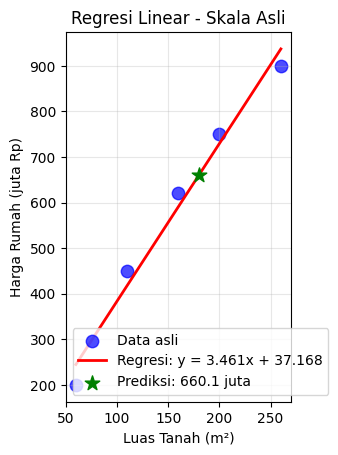

In [12]:
# Plot 1: Data asli dengan regresi
plt.subplot(1, 2, 1)
x_line = np.linspace(x_min, x_max, 100)
y_line = m_actual * x_line + b_actual

plt.scatter(x, y, color='blue', s=80, label='Data asli', alpha=0.7)
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regresi: y = {m_actual:.3f}x + {b_actual:.3f}')
plt.scatter(x_pred, y_pred_2, color='green', s=120, marker='*', label=f'Prediksi: {y_pred_2:.1f} juta', zorder=5)

plt.title("Regresi Linear - Skala Asli")
plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga Rumah (juta Rp)")
plt.legend()
plt.grid(True, alpha=0.3)

In [13]:
# 8. Evaluasi Model
# Prediksi untuk semua data
y_pred_all = m_actual * x + b_actual

# Hitung MSE dan R-squared
mse = np.mean((y - y_pred_all) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred_all) ** 2)
r_squared = 1 - (ss_residual / ss_total)

print(f"\n=== EVALUASI MODEL ===")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Akurasi: {r_squared*100:.2f}%")

# Tampilkan perbandingan prediksi vs aktual
print(f"\nPerbandingan Prediksi vs Aktual:")
print("Luas\tAktual\tPrediksi\tError")
for i in range(len(x)):
    error = y_pred_all[i] - y[i]
    print(f"{x[i]}m²\t{y[i]}jt\t{y_pred_all[i]:.1f}jt\t{error:+.1f}jt")


=== EVALUASI MODEL ===
MSE (Mean Squared Error): 1136.66
R-squared: 0.9807
Akurasi: 98.07%

Perbandingan Prediksi vs Aktual:
Luas	Aktual	Prediksi	Error
60m²	200jt	244.8jt	+44.8jt
110m²	450jt	417.9jt	-32.1jt
160m²	620jt	590.9jt	-29.1jt
200m²	750jt	729.4jt	-20.6jt
260m²	900jt	937.0jt	+37.0jt


In [14]:
print("\n" + "="*50)
print("=== CONTOH SOAL 2: MARKETING vs PENJUALAN ===")
# Data (x = biaya marketing dalam juta, y = penjualan dalam ribu unit)
x = np.array([10, 20, 30, 40, 50])
y = np.array([15, 35, 48, 62, 75])

print("Data Asli:")
print(f"Biaya marketing (juta): {x}")
print(f"Penjualan (ribu unit): {y}")

# Normalisasi
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)
x_norm = (x - x_min) / (x_max - x_min)
y_norm = (y - y_min) / (y_max - y_min)

# OLS
x_mean = np.mean(x_norm)
y_mean = np.mean(y_norm)
m_norm = (np.sum(x_norm*y_norm) - len(x)*x_mean*y_mean) / (np.sum(x_norm**2) - len(x)*x_mean**2)
b_norm = y_mean - m_norm * x_mean

m_actual = m_norm * (y_max - y_min) / (x_max - x_min)
b_actual = b_norm * (y_max - y_min) + y_min - m_actual * x_min

print(f"\nPersamaan Regresi: y = {m_actual:.3f}x + {b_actual:.3f}")

# Prediksi
biaya_prediksi = [15, 25, 35, 45]
print("\nHasil Prediksi:")
for biaya in biaya_prediksi:
    penjualan_pred = m_actual * biaya + b_actual
    print(f"Biaya {biaya} juta → Prediksi penjualan: {penjualan_pred:.1f} ribu unit")

# Evaluasi
y_pred = m_actual * x + b_actual
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))
print(f"\nR-squared: {r_squared:.4f}")


=== CONTOH SOAL 2: MARKETING vs PENJUALAN ===
Data Asli:
Biaya marketing (juta): [10 20 30 40 50]
Penjualan (ribu unit): [15 35 48 62 75]

Persamaan Regresi: y = 1.470x + 2.900

Hasil Prediksi:
Biaya 15 juta → Prediksi penjualan: 24.9 ribu unit
Biaya 25 juta → Prediksi penjualan: 39.7 ribu unit
Biaya 35 juta → Prediksi penjualan: 54.4 ribu unit
Biaya 45 juta → Prediksi penjualan: 69.0 ribu unit

R-squared: 0.9921


=== CONTOH SOAL 2: MARKETING vs PENJUALAN ===
Data Asli:
Biaya marketing (juta): [10 20 30 40 50]
Penjualan (ribu unit): [15 35 48 62 75]

Persamaan Regresi: y = 1.515x + -0.200

Hasil Prediksi:
Biaya 15 juta → Prediksi penjualan: 22.5 ribu unit
Biaya 25 juta → Prediksi penjualan: 37.7 ribu unit
Biaya 35 juta → Prediksi penjualan: 52.8 ribu unit
Biaya 45 juta → Prediksi penjualan: 68.0 ribu unit

R-squared: 0.9979

In [ ]:
print("=== CONTOH SOAL 3: LAMA BELAJAR vs NILAI ===")
# Data (x = jam belajar per minggu, y = nilai ujian)
x = np.array([5, 10, 15, 20, 25])
y = np.array([60, 70, 80, 85, 90])

print(f"\nPersamaan Regresi: y = {m_actual:.3f}x + {b_actual:.3f}")

# Prediksi
jam_prediksi = [8, 12, 18, 22]


=== CONTOH SOAL 3: LAMA BELAJAR vs NILAI ===
Data Asli:
Jam belajar: [ 5 10 15 20 25]
Nilai ujian: [60 70 80 85 90]

Persamaan Regresi: y = 1.550x + 52.250

Hasil Prediksi:
8 jam belajar → Prediksi nilai: 64.6
12 jam belajar → Prediksi nilai: 70.8
18 jam belajar → Prediksi nilai: 80.1
22 jam belajar → Prediksi nilai: 86.3

R-squared: 0.9625

In [ ]:
print("=== CONTOH SOAL 4: PENGALAMAN vs GAJI ===")
# Data (x = tahun pengalaman, y = gaji dalam juta)
x = np.array([1, 3, 5, 7, 10])
y = np.array([5, 8, 12, 15, 20])

# Prediksi
pengalaman_prediksi = [2, 4, 6, 8]


=== CONTOH SOAL 4: PENGALAMAN vs GAJI ===
Data Asli:
Pengalaman (tahun): [ 1  3  5  7 10]
Gaji (juta): [ 5  8 12 15 20]

Persamaan Regresi: y = 1.678x + 3.119

Hasil Prediksi:
2 tahun → Prediksi gaji: 6.5 juta
4 tahun → Prediksi gaji: 9.8 juta
6 tahun → Prediksi gaji: 13.2 juta
8 tahun → Prediksi gaji: 16.5 juta

R-squared: 0.9927